In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML

In [23]:
c = 2.99792458e8
eps0 = 8.854187817e-12
xmu0 = 4*math.pi*1e-7

In [24]:
#Define Parameters
a = 10; b = 10
nx = 100; ny = 100
nx2 = math.ceil(nx/2)
ny2 = math.ceil(ny/2)
nt = 200
nskip = 10
nsnap = math.ceil(nt/nskip)

# Gaussian Source
xndec = 10.0 # Mean
xn0 = 4*xndec # Variance

In [25]:
## Initialize

Ez = np.zeros((nx, ny))  # Z E‑field initialize to zero
Hx = np.zeros((nx, ny))  # X H‑field initialize to zero
Hy = np.zeros((nx, ny))  # Y H‑field initialize to zero
dx = a / (nx-1)  # Define spatial step
dy = dx
ds = dx
############################
############################
dt = ds / (c * math.sqrt(2))  # Stability Condition
############################
############################


In [26]:
# Medium Definition

# Coefficients as defined in Taflove,"Compututational Electrodynamics - The Finite
# Difference Time Domain Method", 2nd ed., pg 85.

# coefficients subject to the medium parameters % % Field Coefficients

dte = np.ones((nx,ny))*dt/(ds*eps0)
dtm = np.ones((nx,ny))*dt/(ds*xmu0)
Da = np.ones((nx,ny))
Db = dtm
Ca = np.ones((nx,ny))
Cb = dte

# Yee's FDTD Algorithm
ims = []
n=1
for i in range(nx):
    for j in range(ny):
        if (i == nx2 and j == ny2): # Place source in the center
            Hz[i,j] = math.exp(-((n-xn0)/(xndec))**2) #Gaussian Source               
        elif (i == 1 or j == 1 or i == nx or j == ny ):               
            Hz[i,j] = 0 #PEC boundaries at the edges   
        else:                
            Hz[i,j] = Hz[i,j]*Da[i,j] + Db[i,j]*(Ey[i,j] - Ey[i-1,j]- (Ex[i,j] - Ex[i,j-1]))               
  
for i in range(nx):
    for j in range(ny-1):          
        Ex[i,j] = Ex[i,j]*Ca[i,j] + Cb[i,j]*(Hz[i,j+1] - Hz[i,j])
 
for i in range(nx-1):
    for j in range(ny):
        Ey[i,j] = Ey[i,j]*Ca[i,j] - Cb[i,j]*(Hz[i+1,j] - Hz[i,j])


ny,nx=Hz.shape
x=np.linspace(0,1,nx)
y=np.linspace(0,1,ny)
xv,yv=np.meshgrid(x,y)

fig=plt.figure()
ax=Axes3D  
ax = fig.add_subplot(111, projection='3d')
dem3d=ax.plot_surface(xv,yv,Hz,cmap='viridis', edgecolor='none')
plt.show()

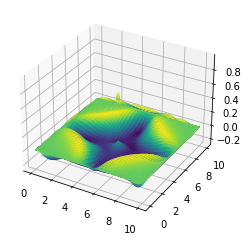

In [27]:
# Yee's FDTD Algorithm
ims = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')   

for n in range(nt):
    for i in range(nx):
        for j in range(ny):
            if (i == nx2-1 and j == ny2-1):  # Place source in the center
                Ez[i, j] = math.exp(-((n+1 - xn0) / (xndec)) ** 2)  # Gaussian Source
            elif (i == 0 or j == 0 or i == nx-1 or j == ny-1):
                Ez[i, j] = 0  # PEC boundaries at the edges
            else:
                Ez[i, j] = Ez[i, j] * Ca[i, j] + Cb[i, j] * (Hy[i, j] - Hy[i - 1, j]- (Hx[i, j] - Hx[i, j - 1]))

    for i in range(nx):
        for j in range(ny-1):
            Hx[i, j] = Hx[i, j] * Da[i, j] - Db[i, j] * (Ez[i, j + 1] - Ez[i, j])

    for i in range(nx-1):
        for j in range(ny):
            Hy[i, j] = Hy[i, j] * Da[i, j] + Db[i, j] * (Ez[i + 1, j] - Ez[i, j])
    
    if (n%nskip)==0:
        ny,nx=Ez.shape
        x=np.linspace(0,a,nx)
        y=np.linspace(0,a,ny)
        xv,yv=np.meshgrid(x,y)
        
        
        dem3d=ax.plot_surface(xv,yv,Ez,cmap='viridis', edgecolor='none')
        ims.append([dem3d])

In [28]:
im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=5000, blit=True)
HTML(im_ani.to_jshtml())